# BitPredict 💰📈

![Bitcoin](https://img.odcdn.com.br/wp-content/uploads/2023/04/Destaque-roubo-criptomoedas.jpg)

In [1]:
# Some imports
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-07-28 19:27:06.945930: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Get Data

In [2]:
# Load data
df = pd.read_csv('/Users/kamil/Documents/Machine-Learning/BitPredict/data/raw/BTC-USD.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
# Check length
print(f'Bitcoin DataFrame length: {len(df)}')

Bitcoin DataFrame length: 3461


In [4]:
# Check info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3461 entries, 2014-09-17 to 2024-03-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3461 non-null   float64
 1   High       3461 non-null   float64
 2   Low        3461 non-null   float64
 3   Close      3461 non-null   float64
 4   Adj Close  3461 non-null   float64
 5   Volume     3461 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 189.3 KB
None


In [5]:
# Check shape
print(f'Shape of the DataFrame: {df.shape}')

Shape of the DataFrame: (3461, 6)


In [6]:
# Import only Price
bitcoin_price = pd.DataFrame(df['Close']).rename(columns = {'Close': 'Price'})
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [7]:
# Get data array
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['Price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014]))

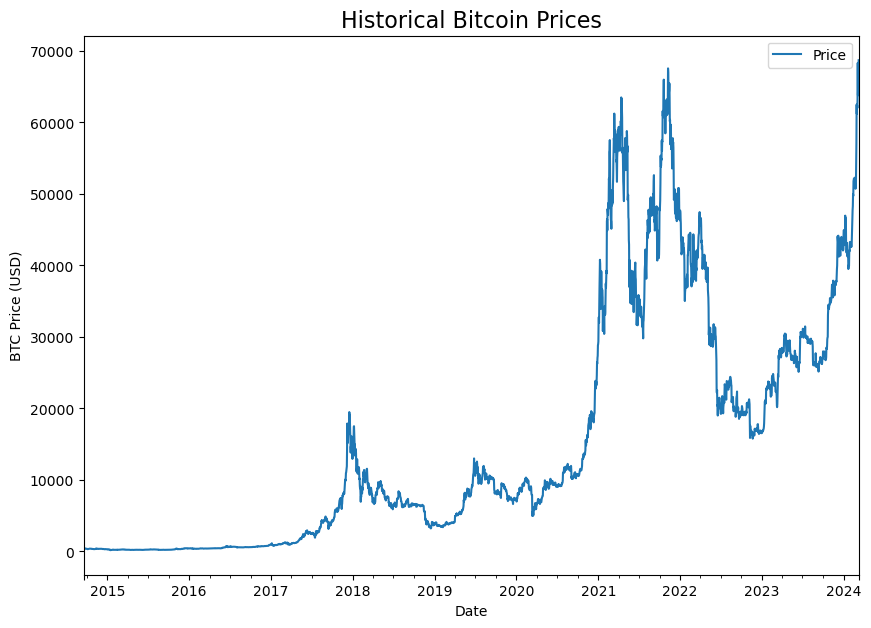

In [8]:
# See our data
bitcoin_price.plot(figsize = (10, 7))
plt.ylabel('BTC Price (USD)')
plt.title('Historical Bitcoin Prices', fontsize = 16);

## Train & Test Split

In [9]:
# Split bitcoin data
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2768, 693, 2768, 693)

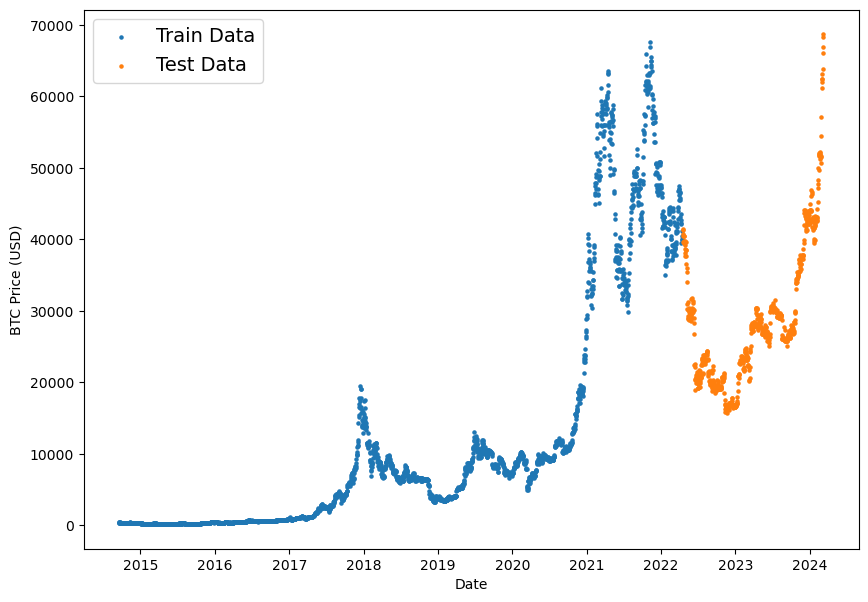

In [10]:
# Plot train and test sets
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = 'Train Data')
plt.scatter(X_test, y_test, s = 5, label = 'Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.legend(fontsize = 14)
plt.show();

In [7]:
# import sys
# import os

# # Dodaj folder 'src' do sys.path
# sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# from visualization.plotting_functions import plot_time_series

## Plotting Function 

In [11]:
# Create function to plot time series
def plot_time_series(timesteps, values, format = '.', start = 0, end = None, label = None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price (USD)")
  if label:
    plt.legend(fontsize = 14) # make label bigger
  plt.grid(True);

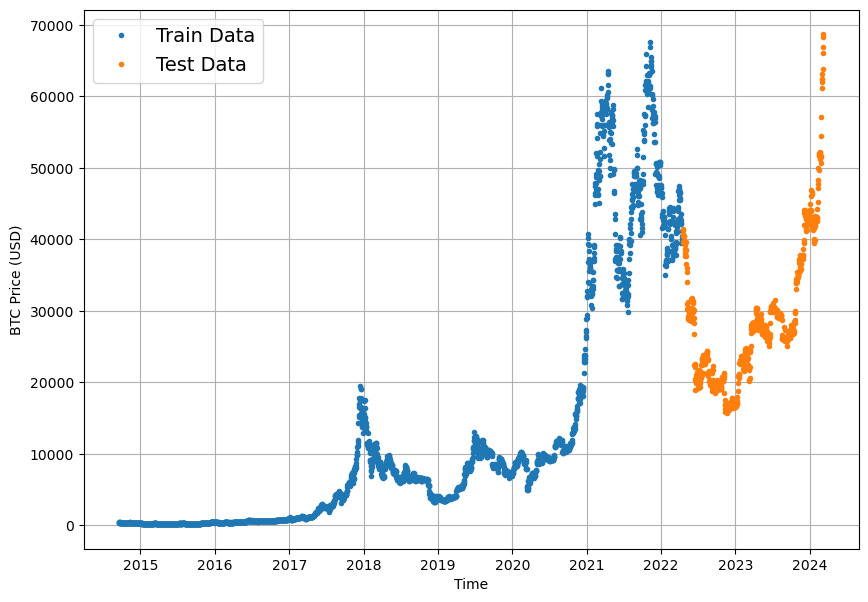

In [12]:
# Try this function
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train,
                 values = y_train,
                 label = 'Train Data')
plot_time_series(timesteps = X_test,
                 values = y_test,
                 label = 'Test Data');

## Modelling Experiments

Modelling experiments:
* 0 Naive model
* 1 Dense model (horizon = 1, window = 7)
* 2 Dense model (horizon = 1, window = 30)
* 3 Dense model (horizon = 7, window = 30)
* 4 Conv1D Neural network
* 5 LSTM Neural network
* 6 Dense model with multivariate data (horizon = 1, window = 7)
* 7 N-BEATs Algorithm
* 8 Ensemble model (multiple models)

## Model 0: Naive Model

In [13]:
# Check testing data
y_test[:10], y_test[-10:]

(array([40424.484375, 39716.953125, 40826.214844, 41502.75    ,
        41374.378906, 40527.363281, 39740.320313, 39486.730469,
        39469.292969, 40458.308594]),
 array([62504.789063, 61198.382813, 62440.632813, 62029.847656,
        63167.371094, 68330.414063, 63801.199219, 66106.804688,
        66925.484375, 68707.796875]))

In [14]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([40424.484375, 39716.953125, 40826.214844, 41502.75    ,
        41374.378906, 40527.363281, 39740.320313, 39486.730469,
        39469.292969, 40458.308594]),
 array([57085.371094, 62504.789063, 61198.382813, 62440.632813,
        62029.847656, 63167.371094, 68330.414063, 63801.199219,
        66106.804688, 66925.484375]))

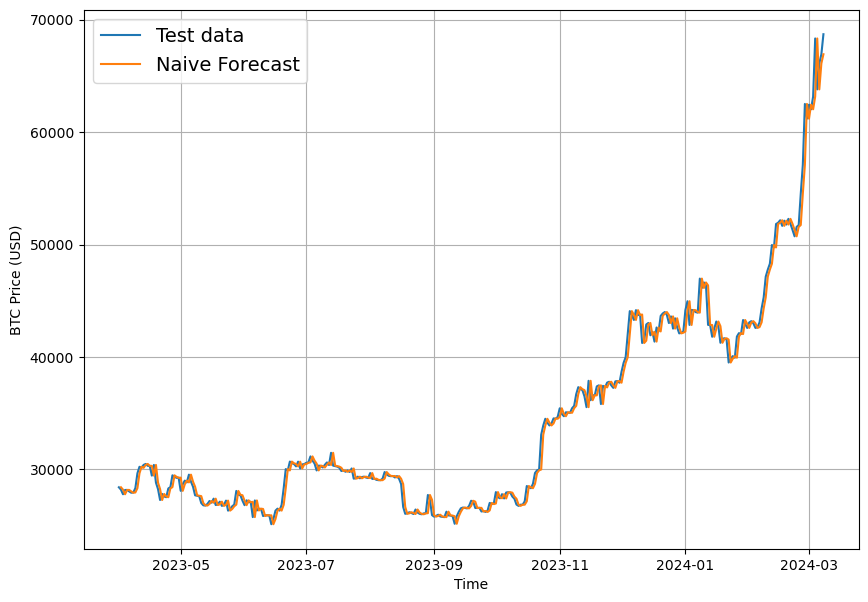

In [15]:
# Plot naive forecast
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test, values = y_test, start = 350, format = '-', label = 'Test data')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, start = 350, format = '-', label = 'Naive Forecast')

### Evaluation

In [16]:
# MASE error
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (Mean Absolute Scaled Error) formula.
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # naive forecast without seasonality

  return mae / mae_naive_no_season

In [17]:
# Create function which take preditions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)
    
    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    
    return {
        "Mean Absolute Error": mae.numpy(),
        "Mean Squared Error": mse.numpy(),
        "Root Mean Squared Error": rmse.numpy(),
        "Mean Absolute Percentage Error": mape.numpy(),
        "Mean Absolute Scaled Error": mase.numpy()
    }

In [18]:
# Evaluate naive forecast
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'Mean Absolute Error': 530.3807,
 'Mean Squared Error': 723649.7,
 'Root Mean Squared Error': 850.676,
 'Mean Absolute Percentage Error': 1.8382434,
 'Mean Absolute Scaled Error': 1.0004835}

### Windowing Dataset

In [19]:
print(f'We want to use: {prices[:7]} to predict this: {prices[7]}')

We want to use: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] to predict this: 423.204987


In [20]:
# Global variables
HORIZON = 1
WINDOW_SIZE = 7

In [21]:
# Create function to label windowed data
def get_labelled_windows(x, horizon = HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [22]:
# Test it
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))

print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [0 1 2 3 4 5 6] -> Label: 7


In [23]:
# Create function to view a NumPy array as a windows
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    """
    window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0) 
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon = horizon)
    return windows, labels

In [24]:
# Create windows and labels
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(3454, 3454)

In [25]:
# View windows and labels
for i in range(3):
    print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


### Train and Test Windows

In [26]:
full_windows[:5], full_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [27]:
# Create function to train/test split timeseries
def make_train_test_splits(windows, labels, test_split = 0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows) * (1 - test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [28]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2763, 691, 2763, 691)

In [29]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [30]:
test_windows[:5], test_labels[:5]

(array([[39521.902344, 40127.183594, 41166.730469, 39935.515625,
         40553.464844, 40424.484375, 39716.953125],
        [40127.183594, 41166.730469, 39935.515625, 40553.464844,
         40424.484375, 39716.953125, 40826.214844],
        [41166.730469, 39935.515625, 40553.464844, 40424.484375,
         39716.953125, 40826.214844, 41502.75    ],
        [39935.515625, 40553.464844, 40424.484375, 39716.953125,
         40826.214844, 41502.75    , 41374.378906],
        [40553.464844, 40424.484375, 39716.953125, 40826.214844,
         41502.75    , 41374.378906, 40527.363281]]),
 array([[40826.214844],
        [41502.75    ],
        [41374.378906],
        [40527.363281],
        [39740.320313]]))

### Modelling Checkpoint Callback

In [31]:
def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_loss',
                                            verbose = 0, # only output a limited amount of text
                                            save_best_only = True)

## Model 1: Dense Model (window = 7, horizon = 1)

In [32]:
HORIZON = 1
WINDOW_SIZE = 7

In [33]:
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear')
], name = 'model_1_dense')

# 2. Compile
model_1.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# 3. Fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
 1/22 [>.............................] - ETA: 12s - loss: 13452.5107 - mae: 13452.5107 - mse: 517499072.0000

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 32ms/step - loss: 5386.1255 - mae: 5386.1255 - mse: 132035320.0000 - val_loss: 5024.6348 - val_mae: 5024.6348 - val_mse: 28997492.0000
Epoch 2/100
 1/22 [>.............................] - ETA: 0s - loss: 2339.4990 - mae: 2339.4990 - mse: 17076558.0000

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 26ms/step - loss: 1095.0806 - mae: 1095.0806 - mse: 5395121.0000 - val_loss: 1211.7080 - val_mae: 1211.7080 - val_mse: 2534310.0000
Epoch 3/100
 1/22 [>.............................] - ETA: 0s - loss: 822.5565 - mae: 822.5565 - mse: 3218816.7500

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 588.8542 - mae: 588.8542 - mse: 1590815.8750 - val_loss: 889.2496 - val_mae: 889.2496 - val_mse: 1798574.8750
Epoch 4/100
 1/22 [>.............................] - ETA: 0s - loss: 525.0201 - mae: 525.0201 - mse: 1389050.2500

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 539.8669 - mae: 539.8669 - mse: 1373178.2500 - val_loss: 828.6069 - val_mae: 828.6069 - val_mse: 1655020.0000
Epoch 5/100
 1/22 [>.............................] - ETA: 0s - loss: 473.2807 - mae: 473.2807 - mse: 1040949.9375

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 531.0692 - mae: 531.0692 - mse: 1324727.3750 - val_loss: 813.7515 - val_mae: 813.7515 - val_mse: 1556708.6250
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 519.6345 - mae: 519.6345 - mse: 1281856.1250 - val_loss: 817.2300 - val_mae: 817.2300 - val_mse: 1463502.2500
Epoch 7/100
 1/22 [>.............................] - ETA: 0s - loss: 581.8640 - mae: 581.8640 - mse: 1349608.7500

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 20ms/step - loss: 509.8098 - mae: 509.8098 - mse: 1240364.1250 - val_loss: 745.6628 - val_mae: 745.6628 - val_mse: 1328425.5000
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 494.1885 - mae: 494.1885 - mse: 1154395.8750 - val_loss: 800.2361 - val_mae: 800.2361 - val_mse: 1348640.3750
Epoch 9/100
 1/22 [>.............................] - ETA: 0s - loss: 530.9857 - mae: 530.9857 - mse: 1201154.1250

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 480.0453 - mae: 480.0453 - mse: 1104573.1250 - val_loss: 731.6989 - val_mae: 731.6989 - val_mse: 1220160.8750
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 482.0244 - mae: 482.0244 - mse: 1114040.5000 - val_loss: 910.0142 - val_mae: 910.0142 - val_mse: 1493819.2500
Epoch 11/100
 1/22 [>.............................] - ETA: 0s - loss: 499.2530 - mae: 499.2530 - mse: 1031055.6875

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 467.5460 - mae: 467.5460 - mse: 1007837.8125 - val_loss: 704.0032 - val_mae: 704.0032 - val_mse: 1124824.2500
Epoch 12/100
 1/22 [>.............................] - ETA: 0s - loss: 500.6459 - mae: 500.6459 - mse: 1034391.1250

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 440.6770 - mae: 440.6770 - mse: 936723.6250 - val_loss: 655.7524 - val_mae: 655.7524 - val_mse: 1060150.1250
Epoch 13/100
22/22 [==============================] - 0s 2ms/step - loss: 441.8611 - mae: 441.8611 - mse: 963470.4375 - val_loss: 673.4998 - val_mae: 673.4998 - val_mse: 1039917.5625
Epoch 14/100
 1/22 [>.............................] - ETA: 0s - loss: 507.1609 - mae: 507.1609 - mse: 1193075.8750

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 20ms/step - loss: 425.8926 - mae: 425.8926 - mse: 898750.6875 - val_loss: 647.8878 - val_mae: 647.8878 - val_mse: 993309.7500
Epoch 15/100
22/22 [==============================] - 0s 2ms/step - loss: 419.9079 - mae: 419.9079 - mse: 865194.3750 - val_loss: 834.4033 - val_mae: 834.4033 - val_mse: 1264891.3750
Epoch 16/100
 1/22 [>.............................] - ETA: 0s - loss: 428.9747 - mae: 428.9747 - mse: 984159.7500

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 432.9110 - mae: 432.9110 - mse: 912679.5625 - val_loss: 616.0225 - val_mae: 616.0225 - val_mse: 934492.0625
Epoch 17/100
22/22 [==============================] - 0s 2ms/step - loss: 414.8970 - mae: 414.8970 - mse: 850047.9375 - val_loss: 733.3596 - val_mae: 733.3596 - val_mse: 1065834.0000
Epoch 18/100
 1/22 [>.............................] - ETA: 0s - loss: 426.2657 - mae: 426.2657 - mse: 888546.2500

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 23ms/step - loss: 407.9662 - mae: 407.9662 - mse: 818197.3750 - val_loss: 602.1749 - val_mae: 602.1749 - val_mse: 898887.2500
Epoch 19/100
22/22 [==============================] - 0s 2ms/step - loss: 408.6344 - mae: 408.6344 - mse: 838552.8750 - val_loss: 621.5233 - val_mae: 621.5233 - val_mse: 939083.7500
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 414.7693 - mae: 414.7693 - mse: 844842.3125 - val_loss: 638.1100 - val_mae: 638.1100 - val_mse: 910133.7500
Epoch 21/100
 1/22 [>.............................] - ETA: 0s - loss: 550.3792 - mae: 550.3792 - mse: 1332725.0000

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 20ms/step - loss: 408.1421 - mae: 408.1421 - mse: 827613.1875 - val_loss: 592.3225 - val_mae: 592.3225 - val_mse: 865314.1875
Epoch 22/100
22/22 [==============================] - 0s 2ms/step - loss: 394.9114 - mae: 394.9114 - mse: 788634.6250 - val_loss: 658.2871 - val_mae: 658.2871 - val_mse: 985506.3750
Epoch 23/100
22/22 [==============================] - 0s 2ms/step - loss: 395.7825 - mae: 395.7825 - mse: 804289.8125 - val_loss: 605.7337 - val_mae: 605.7337 - val_mse: 887996.3750
Epoch 24/100
22/22 [==============================] - 0s 2ms/step - loss: 398.3011 - mae: 398.3011 - mse: 794059.7500 - val_loss: 853.7235 - val_mae: 853.7235 - val_mse: 1366172.7500
Epoch 25/100
22/22 [==============================] - 0s 2ms/step - loss: 408.2415 - mae: 408.2415 - mse: 810791.3750 - val_loss: 601.6406 - val_mae: 601.6406 - val_mse: 872975.4375
Epoch 26/100
 1/22 [>.............................] - ETA: 0s - loss: 321.8865 - mae: 321.8865 - mse:

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 21ms/step - loss: 395.6071 - mae: 395.6071 - mse: 787905.3750 - val_loss: 581.3869 - val_mae: 581.3869 - val_mse: 826116.9375
Epoch 27/100
 1/22 [>.............................] - ETA: 0s - loss: 275.3874 - mae: 275.3874 - mse: 329864.8125

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 25ms/step - loss: 404.5518 - mae: 404.5518 - mse: 803407.5625 - val_loss: 580.3058 - val_mae: 580.3058 - val_mse: 827954.7500
Epoch 28/100
22/22 [==============================] - 0s 2ms/step - loss: 393.8429 - mae: 393.8429 - mse: 779542.6250 - val_loss: 679.1926 - val_mae: 679.1926 - val_mse: 1004868.3750
Epoch 29/100
22/22 [==============================] - 0s 2ms/step - loss: 404.1565 - mae: 404.1565 - mse: 823508.1875 - val_loss: 580.5521 - val_mae: 580.5521 - val_mse: 814012.1250
Epoch 30/100
22/22 [==============================] - 0s 2ms/step - loss: 416.3646 - mae: 416.3646 - mse: 850415.0625 - val_loss: 981.3999 - val_mae: 981.3999 - val_mse: 1515693.2500
Epoch 31/100
22/22 [==============================] - 0s 2ms/step - loss: 405.2671 - mae: 405.2671 - mse: 797962.6250 - val_loss: 659.4977 - val_mae: 659.4977 - val_mse: 898842.8750
Epoch 32/100
 1/22 [>.............................] - ETA: 0s - loss: 447.0126 - mae: 447.0126 - mse

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 21ms/step - loss: 387.3383 - mae: 387.3383 - mse: 753168.8750 - val_loss: 571.3487 - val_mae: 571.3487 - val_mse: 801021.2500
Epoch 33/100
22/22 [==============================] - 0s 2ms/step - loss: 409.0566 - mae: 409.0566 - mse: 856570.8125 - val_loss: 589.2991 - val_mae: 589.2991 - val_mse: 835270.9375
Epoch 34/100
22/22 [==============================] - 0s 2ms/step - loss: 382.9404 - mae: 382.9404 - mse: 745081.5625 - val_loss: 714.1364 - val_mae: 714.1364 - val_mse: 973509.4375
Epoch 35/100
22/22 [==============================] - 0s 2ms/step - loss: 400.9137 - mae: 400.9137 - mse: 803838.8750 - val_loss: 573.5260 - val_mae: 573.5260 - val_mse: 792288.3125
Epoch 36/100
22/22 [==============================] - 0s 2ms/step - loss: 388.7749 - mae: 388.7749 - mse: 767186.2500 - val_loss: 897.3018 - val_mae: 897.3018 - val_mse: 1319317.1250
Epoch 37/100
 1/22 [>.............................] - ETA: 0s - loss: 357.7430 - mae: 357.7430 - mse:

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 31ms/step - loss: 422.3788 - mae: 422.3788 - mse: 846773.1250 - val_loss: 565.7396 - val_mae: 565.7396 - val_mse: 790830.9375
Epoch 38/100
22/22 [==============================] - 0s 2ms/step - loss: 399.9807 - mae: 399.9807 - mse: 810824.9375 - val_loss: 743.4251 - val_mae: 743.4251 - val_mse: 1107965.0000
Epoch 39/100
22/22 [==============================] - 0s 2ms/step - loss: 383.0793 - mae: 383.0793 - mse: 738846.6875 - val_loss: 581.9580 - val_mae: 581.9580 - val_mse: 794772.1250
Epoch 40/100
22/22 [==============================] - 0s 2ms/step - loss: 388.6458 - mae: 388.6458 - mse: 769104.1875 - val_loss: 640.4240 - val_mae: 640.4240 - val_mse: 861091.7500
Epoch 41/100
22/22 [==============================] - 0s 2ms/step - loss: 376.4219 - mae: 376.4219 - mse: 719968.1250 - val_loss: 627.6879 - val_mae: 627.6879 - val_mse: 895285.1875
Epoch 42/100
22/22 [==============================] - 0s 2ms/step - loss: 380.0464 - mae: 380.0464 - 

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 18ms/step - loss: 381.4872 - mae: 381.4872 - mse: 743195.6250 - val_loss: 556.4150 - val_mae: 556.4150 - val_mse: 769844.0000
Epoch 45/100
 1/22 [>.............................] - ETA: 0s - loss: 396.3940 - mae: 396.3940 - mse: 982957.7500

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 372.1276 - mae: 372.1276 - mse: 730104.5000 - val_loss: 555.1556 - val_mae: 555.1556 - val_mse: 766036.0000
Epoch 46/100
22/22 [==============================] - 0s 2ms/step - loss: 370.0141 - mae: 370.0141 - mse: 714300.1250 - val_loss: 558.7842 - val_mae: 558.7842 - val_mse: 775898.1250
Epoch 47/100
22/22 [==============================] - 0s 2ms/step - loss: 368.5362 - mae: 368.5362 - mse: 703204.0000 - val_loss: 557.7525 - val_mae: 557.7525 - val_mse: 760795.5000
Epoch 48/100
22/22 [==============================] - 0s 2ms/step - loss: 375.8545 - mae: 375.8545 - mse: 735472.2500 - val_loss: 766.3377 - val_mae: 766.3377 - val_mse: 1047964.0625
Epoch 49/100
22/22 [==============================] - 0s 2ms/step - loss: 409.6819 - mae: 409.6819 - mse: 803285.6875 - val_loss: 732.0120 - val_mae: 732.0120 - val_mse: 1072829.1250
Epoch 50/100
22/22 [==============================] - 0s 2ms/step - loss: 384.1302 - mae: 384.1302 -

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 23ms/step - loss: 382.8445 - mae: 382.8445 - mse: 750824.8125 - val_loss: 552.4412 - val_mae: 552.4412 - val_mse: 752005.5625
Epoch 52/100
22/22 [==============================] - 0s 3ms/step - loss: 371.0016 - mae: 371.0016 - mse: 704337.6250 - val_loss: 1246.1748 - val_mae: 1246.1748 - val_mse: 2304182.5000
Epoch 53/100
22/22 [==============================] - 0s 2ms/step - loss: 400.0951 - mae: 400.0951 - mse: 818977.6250 - val_loss: 569.1744 - val_mae: 569.1744 - val_mse: 791760.7500
Epoch 54/100
 1/22 [>.............................] - ETA: 0s - loss: 429.6331 - mae: 429.6331 - mse: 870019.0000

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 24ms/step - loss: 375.2307 - mae: 375.2307 - mse: 715966.6250 - val_loss: 547.5833 - val_mae: 547.5833 - val_mse: 754803.7500
Epoch 55/100
22/22 [==============================] - 0s 2ms/step - loss: 373.8460 - mae: 373.8460 - mse: 726658.5625 - val_loss: 552.0483 - val_mae: 552.0483 - val_mse: 763302.1250
Epoch 56/100
22/22 [==============================] - 0s 2ms/step - loss: 381.7518 - mae: 381.7518 - mse: 738167.2500 - val_loss: 927.7070 - val_mae: 927.7070 - val_mse: 1472007.0000
Epoch 57/100
22/22 [==============================] - 0s 2ms/step - loss: 393.4206 - mae: 393.4206 - mse: 769132.5625 - val_loss: 594.5800 - val_mae: 594.5800 - val_mse: 786575.8125
Epoch 58/100
22/22 [==============================] - 0s 3ms/step - loss: 407.7521 - mae: 407.7521 - mse: 828328.7500 - val_loss: 600.4688 - val_mae: 600.4688 - val_mse: 793134.6875
Epoch 59/100
22/22 [==============================] - 0s 2ms/step - loss: 396.0812 - mae: 396.0812 - 

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 24ms/step - loss: 362.5351 - mae: 362.5351 - mse: 684708.6250 - val_loss: 547.2940 - val_mae: 547.2940 - val_mse: 735255.9375
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 381.8846 - mae: 381.8846 - mse: 737078.8125 - val_loss: 811.3936 - val_mae: 811.3936 - val_mse: 1216723.1250
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 385.9404 - mae: 385.9404 - mse: 761925.1875 - val_loss: 610.1844 - val_mae: 610.1844 - val_mse: 850767.6250
Epoch 66/100
 1/22 [>.............................] - ETA: 0s - loss: 467.9636 - mae: 467.9636 - mse: 933564.7500

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 22ms/step - loss: 368.7787 - mae: 368.7787 - mse: 689908.6875 - val_loss: 547.2260 - val_mae: 547.2260 - val_mse: 734531.8125
Epoch 67/100
22/22 [==============================] - 0s 2ms/step - loss: 359.4066 - mae: 359.4066 - mse: 692211.3750 - val_loss: 549.7271 - val_mae: 549.7271 - val_mse: 734845.5625
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 357.4529 - mae: 357.4529 - mse: 672604.4375 - val_loss: 567.6843 - val_mae: 567.6843 - val_mse: 783769.6250
Epoch 69/100
22/22 [==============================] - 0s 3ms/step - loss: 371.1507 - mae: 371.1507 - mse: 701302.1250 - val_loss: 708.8884 - val_mae: 708.8884 - val_mse: 938927.5000
Epoch 70/100
 1/22 [>.............................] - ETA: 0s - loss: 476.0024 - mae: 476.0024 - mse: 1064094.0000

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 22ms/step - loss: 381.5908 - mae: 381.5908 - mse: 727301.4375 - val_loss: 540.2895 - val_mae: 540.2895 - val_mse: 729724.6875
Epoch 71/100
22/22 [==============================] - 0s 2ms/step - loss: 358.5456 - mae: 358.5456 - mse: 679077.0625 - val_loss: 743.3012 - val_mae: 743.3012 - val_mse: 997579.7500
Epoch 72/100
22/22 [==============================] - 0s 2ms/step - loss: 372.8627 - mae: 372.8627 - mse: 712131.9375 - val_loss: 642.0580 - val_mae: 642.0580 - val_mse: 839396.8750
Epoch 73/100
22/22 [==============================] - 0s 2ms/step - loss: 373.6994 - mae: 373.6994 - mse: 704748.3750 - val_loss: 623.4180 - val_mae: 623.4180 - val_mse: 813819.9375
Epoch 74/100
22/22 [==============================] - 0s 2ms/step - loss: 366.2209 - mae: 366.2209 - mse: 697727.3750 - val_loss: 581.1977 - val_mae: 581.1977 - val_mse: 761544.6250
Epoch 75/100
22/22 [==============================] - 0s 2ms/step - loss: 361.0071 - mae: 361.0071 - m

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 361.6413 - mae: 361.6413 - mse: 678398.0625 - val_loss: 534.9746 - val_mae: 534.9746 - val_mse: 726614.9375
Epoch 80/100
 1/22 [>.............................] - ETA: 0s - loss: 359.1454 - mae: 359.1454 - mse: 610877.5625

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 19ms/step - loss: 359.4973 - mae: 359.4973 - mse: 687866.0000 - val_loss: 534.8843 - val_mae: 534.8843 - val_mse: 728112.9375
Epoch 81/100
22/22 [==============================] - 0s 2ms/step - loss: 358.1604 - mae: 358.1604 - mse: 669797.7500 - val_loss: 539.4036 - val_mae: 539.4036 - val_mse: 721456.0625
Epoch 82/100
22/22 [==============================] - 0s 2ms/step - loss: 370.2367 - mae: 370.2367 - mse: 728756.8750 - val_loss: 608.5036 - val_mae: 608.5036 - val_mse: 844968.5000
Epoch 83/100
22/22 [==============================] - 0s 2ms/step - loss: 354.1580 - mae: 354.1580 - mse: 673329.0000 - val_loss: 569.3885 - val_mae: 569.3885 - val_mse: 784348.2500
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 363.6596 - mae: 363.6596 - mse: 683353.0625 - val_loss: 574.9214 - val_mae: 574.9214 - val_mse: 750263.9375
Epoch 85/100
22/22 [==============================] - 0s 3ms/step - loss: 370.5120 - mae: 370.5120 - m

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 21ms/step - loss: 348.5176 - mae: 348.5176 - mse: 647472.5000 - val_loss: 533.8016 - val_mae: 533.8016 - val_mse: 715331.2500
Epoch 100/100
 1/22 [>.............................] - ETA: 0s - loss: 335.6818 - mae: 335.6818 - mse: 607203.9375

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 23ms/step - loss: 347.5449 - mae: 347.5449 - mse: 645958.4375 - val_loss: 531.2782 - val_mae: 531.2782 - val_mse: 718646.0625


In [34]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 1ms/step - loss: 531.2782 - mae: 531.2782 - mse: 718646.1250


[531.2781982421875, 531.2781982421875, 718646.125]

In [35]:
# Load best performing model 1
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 951us/step - loss: 531.2782 - mae: 531.2782 - mse: 718646.1250


[531.2781982421875, 531.2781982421875, 718646.125]

### Make Forecast

In [36]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [37]:
# Make preditions using model 1 on test dataset
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:5]

22/22 [==============================] - 0s 944us/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([39834.05 , 40635.242, 41448.55 , 41442.418, 40704.3  ],
      dtype=float32)>

In [38]:
# Evaluate preditions
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'Mean Absolute Error': 531.27814,
 'Mean Squared Error': 718646.1,
 'Root Mean Squared Error': 847.73,
 'Mean Absolute Percentage Error': 1.8565294,
 'Mean Absolute Scaled Error': 1.0037658}

In [39]:
naive_results

{'Mean Absolute Error': 530.3807,
 'Mean Squared Error': 723649.7,
 'Root Mean Squared Error': 850.676,
 'Mean Absolute Percentage Error': 1.8382434,
 'Mean Absolute Scaled Error': 1.0004835}

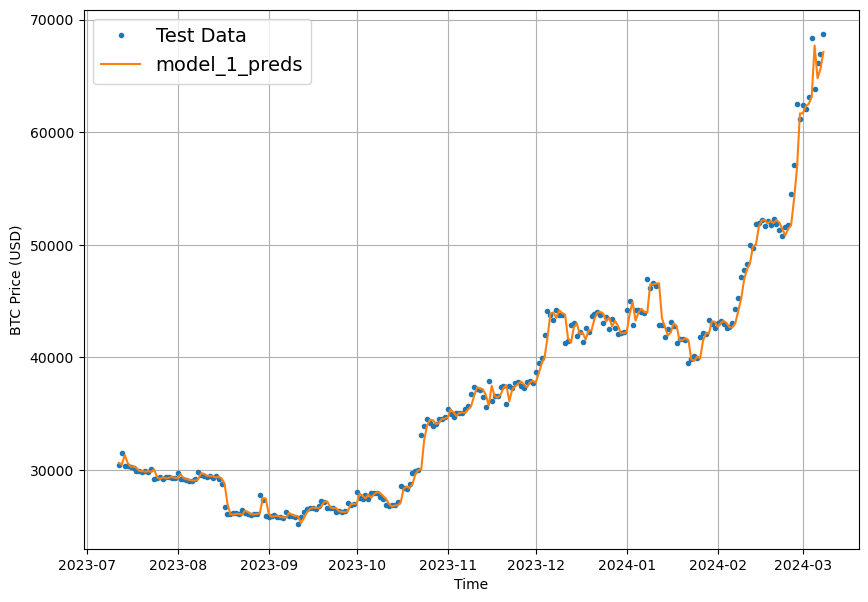

In [40]:
# Plot model 1 preditions
offset = 450
plt.figure(figsize = (10, 7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 label = 'Test Data')

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = '-',
                 label = 'model_1_preds');

## Model 2: Dense Model (window = 30, horizon = 1)

In [41]:
HORIZON = 1
WINDOW_SIZE = 30

In [42]:
# Make windowed and labeled data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(3431, 3431)

In [43]:
# Make train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2744, 687, 2744, 687)

In [44]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_2_dense')

# Compile model
model_2.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit model
model_2.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 0,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


In [45]:
# Evaluate model
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 868us/step - loss: 582.8145 - mae: 582.8145 - mse: 816106.5000


[582.814453125, 582.814453125, 816106.5]

In [46]:
# Load best model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 981us/step - loss: 571.5029 - mae: 571.5029 - mse: 789122.8750


[571.5028686523438, 571.5028686523438, 789122.875]

In [47]:
# Make predictions
model_2_preds = make_preds(model_2, test_windows)

22/22 [==============================] - 0s 777us/step


In [48]:
# Evaluate model 2 predictions
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

{'Mean Absolute Error': 571.5028,
 'Mean Squared Error': 789122.6,
 'Root Mean Squared Error': 888.32574,
 'Mean Absolute Percentage Error': 2.0166574,
 'Mean Absolute Scaled Error': 1.0807217}

In [49]:
model_1_results

{'Mean Absolute Error': 531.27814,
 'Mean Squared Error': 718646.1,
 'Root Mean Squared Error': 847.73,
 'Mean Absolute Percentage Error': 1.8565294,
 'Mean Absolute Scaled Error': 1.0037658}

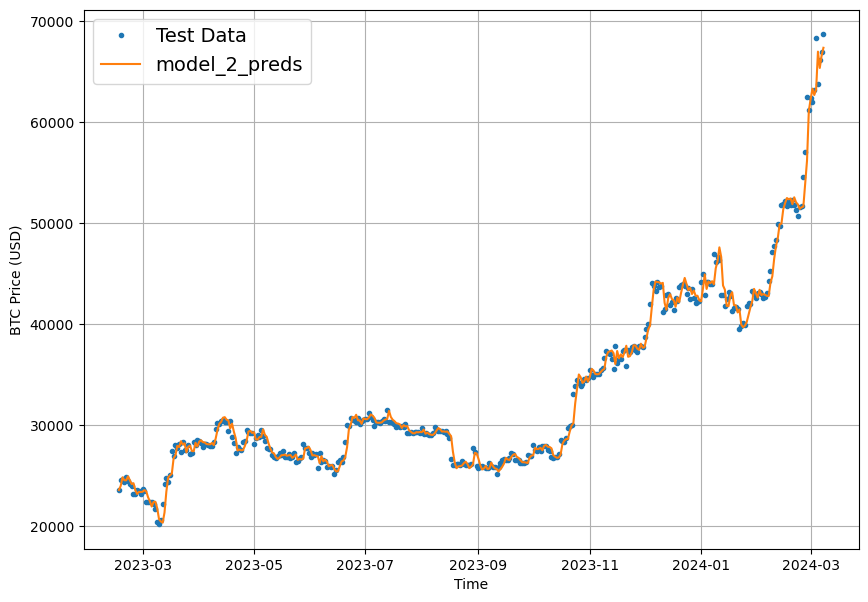

In [50]:
# Plot model 2 predictions
offset = 300

plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_2_preds, start = offset, format = "-", label = "model_2_preds");

## Model 3: Dense Model (window = 30, horizon = 7)

In [51]:
HORIZON = 7
WINDOW_SIZE = 30

In [52]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(3425, 3425)

In [53]:
# Train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2740, 685, 2740, 685)

In [54]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_3_dense')

# Compile
model_3.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


In [55]:
# Evaluate model on test data
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 1ms/step - loss: 1174.2037 - mae: 1174.2037 - mse: 3494130.2500


[1174.2037353515625, 1174.2037353515625, 3494130.25]

In [56]:
# Make predictions
model_3_preds = make_preds(model_3, test_windows)

model_3_preds[:5]

22/22 [==============================] - 0s 755us/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[40059.305, 40438.152, 39614.36 , 40139.36 , 40861.625, 40048.316,
        40367.75 ],
       [40292.793, 40870.344, 40148.48 , 40974.113, 41201.848, 40896.12 ,
        41151.4  ],
       [40489.01 , 42260.504, 40506.62 , 41285.36 , 41224.273, 41163.027,
        41594.07 ],
       [41217.11 , 41777.223, 41287.965, 41299.18 , 41965.305, 41541.77 ,
        41786.71 ],
       [42339.25 , 42329.02 , 41647.19 , 41532.04 , 41932.836, 41081.13 ,
        42005.44 ]], dtype=float32)>

In [57]:
# Result model 3
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)

model_3_results

{'Mean Absolute Error': 1174.2039,
 'Mean Squared Error': 3494130.2,
 'Root Mean Squared Error': 1347.5404,
 'Mean Absolute Percentage Error': 4.1475577,
 'Mean Absolute Scaled Error': 2.2520688}

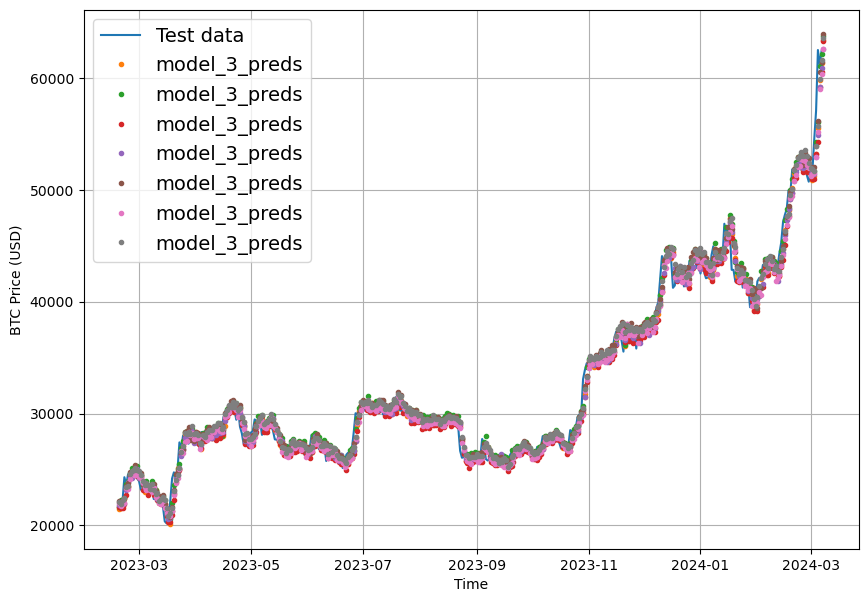

In [58]:
# PLot predictions
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, format = "-", label = "Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_3_preds, start = offset, label = "model_3_preds");

## Summary Dense Models

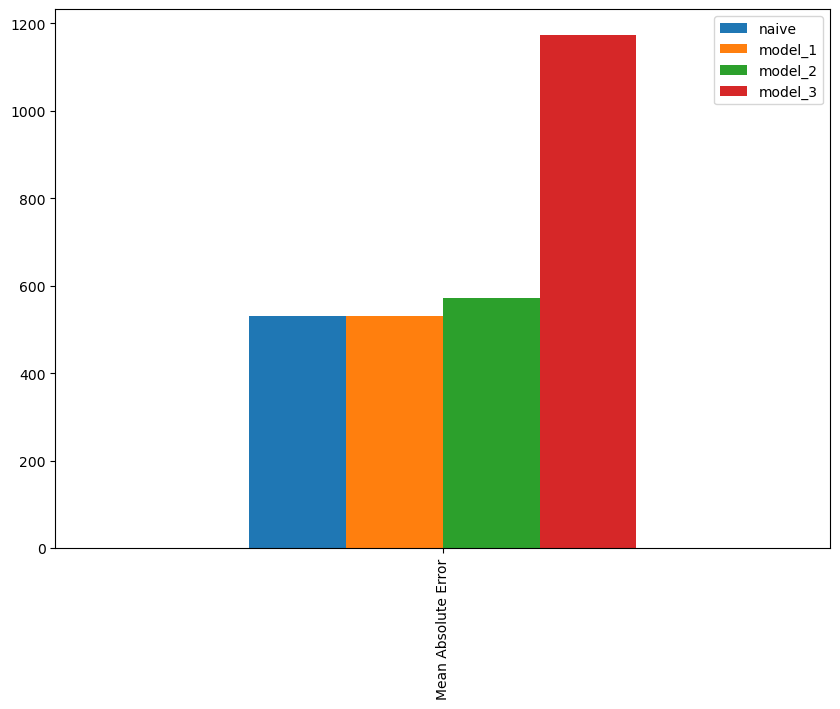

In [59]:
pd.DataFrame({
    'naive': naive_results['Mean Absolute Error'],
    'model_1': model_1_results['Mean Absolute Error'],
    'model_2': model_2_results['Mean Absolute Error'],
    'model_3': model_3_results['Mean Absolute Error']
}, index = ['Mean Absolute Error']).plot(figsize = (10, 7), kind = 'bar');

## Model 4: Conv1D Neural Network

In [60]:
HORIZON = 1
WINDOW_SIZE = 7

In [61]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(3454, 3454)

In [62]:
# Create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2763, 691, 2763, 691)

In [63]:
# Shape of train data
train_windows[0].shape, train_labels[0].shape

((7,), (1,))

In [64]:
# Test reshaping
tmp = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(tmp, axis = 1))

print(f'Original shape: {tmp.shape}')
print(f'Expanded shape: {expand_dims_layer(tmp).shape}')
print(f'Original values with expanded shape:\n {expand_dims_layer(tmp)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334015]
 [424.440002]
 [394.79599 ]
 [408.903992]
 [398.821014]
 [402.152008]
 [435.790985]]


In [65]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, padding = 'causal', activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_4_conv1d')

# Compile
model_4.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

2024-07-28 19:28:03.045386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:03.229499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:03.906544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:04.051012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:04.485359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:04.621031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:05.043059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:05.177194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:05.689546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:05.835405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:06.250834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:06.387529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:06.868813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:07.004767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:07.480431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:07.616753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:08.053668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:08.218646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:08.676432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:08.856745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:09.383119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:09.517319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:09.961581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:10.361554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:10.839950: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:10.985828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:11.544380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:11.677351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:12.194453: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:12.326283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:12.846220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:12.982991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:13.553892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:13.699521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:14.275079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:14.404703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:14.917674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:15.050609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:15.506680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:15.653781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:16.179271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:16.315949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:16.924169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:17.059077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:17.607797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:17.992431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:18.418183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:18.557419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:19.559344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:19.692089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:20.350396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:20.482139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:20.942537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:21.077678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:21.737080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:21.871103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:22.435395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:22.571882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:23.129534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:23.264701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
2024-07-28 19:28:24.026057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]
2024-07-28 19:28:24.157898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets


In [66]:
# Summarize
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Evaluate
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1d/')
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 1ms/step - loss: 532.8784 - mae: 532.8784 - mse: 730841.4375


[532.87841796875, 532.87841796875, 730841.4375]

In [68]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

22/22 [==============================] - 0s 817us/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([39779.055, 40622.477, 41314.07 , 41388.926, 40704.18 ],
      dtype=float32)>

In [69]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'Mean Absolute Error': 532.8784,
 'Mean Squared Error': 730841.44,
 'Root Mean Squared Error': 854.89264,
 'Mean Absolute Percentage Error': 1.8597711,
 'Mean Absolute Scaled Error': 1.0067892}

## Model 5: Recurent Neural Network LSTM

In [70]:
train_windows[:5], train_labels[:5], train_windows[0].shape, train_labels[0].shape

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]),
 (7,),
 (1,))

In [71]:
tf.random.set_seed(42)

# Build a model
inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs, outputs = output, name = 'model_5_lstm')

# Compile
model_5.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit
model_5.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

2024-07-28 19:28:27.036827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:27.046081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:27.515433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1' with dtype float and shape [?,7]
	 [[{{node input_1}}]]
2024-07-28 19:28

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:28.909795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:28.917517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:29.116612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:30.552611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:30.560921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:30.758886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:32.110225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:32.118104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:32.311122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:34.582534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:34.589857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:34.782327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:36.583446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:36.591464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:36.783619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:38.103760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:38.111038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:38.323530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:39.780951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:39.788898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:39.990273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:41.433550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:41.440678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:41.630595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:43.548219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:43.555698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:43.753085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:45.185937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:45.194800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:45.388835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:46.811100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:46.818578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:47.011264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:48.499322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:48.506957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:48.708172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:50.120361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:50.128796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:50.322142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:51.995313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:52.003477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:52.193721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:53.683137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:53.690333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:53.879496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:55.330077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:55.338666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:55.526255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:56.827127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:56.834370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:57.023573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:28:58.806831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:58.814198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:28:59.010460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:00.318223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:00.325672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:00.513411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:01.851305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:01.858581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:02.047048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:03.614064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:03.622134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:03.818071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:05.411672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:05.419148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:05.928202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:07.267218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:07.275000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:07.468656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:08.967311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:08.979044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:09.179099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:10.621750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:10.628855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:10.818667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:12.747794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:12.755250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:12.986025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:14.701124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:14.708819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:14.896211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:16.341316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:16.348905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:16.539284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:18.028531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:18.035778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:18.241619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:19.840885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:19.847898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:20.034824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:21.973779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:21.981519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:22.218318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:23.550123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:23.557331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:23.757091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:25.206550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:25.214345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:25.405691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:26.963884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:26.972062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:27.163798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:28.590236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:28.598671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:28.794119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:30.833626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:30.840689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:31.029536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
2024-07-28 19:29:32.521674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:32.529240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,7]
	 [[{{node inputs}}]]
2024-07-28 19:29:32.717988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1'

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


In [72]:
# Evaluate on test data
model_5 = tf.keras.models.load_model('model_experiments/model_5_lstm/')
model_5.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 1ms/step - loss: 575.1639 - mae: 575.1639 - mse: 809192.5625


[575.1639404296875, 575.1639404296875, 809192.5625]

In [73]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([40214.043, 40451.05 , 41101.945, 41509.73 , 40936.44 ],
      dtype=float32)>

In [74]:
# Evaluiate predictions
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'Mean Absolute Error': 575.164,
 'Mean Squared Error': 809192.9,
 'Root Mean Squared Error': 899.5515,
 'Mean Absolute Percentage Error': 2.0244303,
 'Mean Absolute Scaled Error': 1.0866811}

### Multivariate time series dataset - Halving

In [75]:
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [76]:
bitcoin_price.index[0], bitcoin_price.index[-1]

(Timestamp('2014-09-17 00:00:00'), Timestamp('2024-03-08 00:00:00'))

In [77]:
# Add halving events
block_reward_1 = 50 # 3.01.2009 - this reward isn't in dataset
block_reward_2 = 25 # 28.11.2012 
block_reward_3 = 12.5 # 9.7.2016
block_reward_4 = 6.25 # 18.5.2020
block_reward_5 = 3.125 # 19.04.2024 - this reward isn't in dataset

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')
block_reward_5_datetime = np.datetime64('2024-04-19')

In [78]:
# Create ranges
block_reward_2_days = (block_reward_3_datetime - bitcoin_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_price.index[0]).days

block_reward_2_days, block_reward_3_days

(661, 2070)

In [79]:
# Add another column to our DataFrame
bitcoin_prices_block = bitcoin_price.copy()
bitcoin_prices_block['block_reward'] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


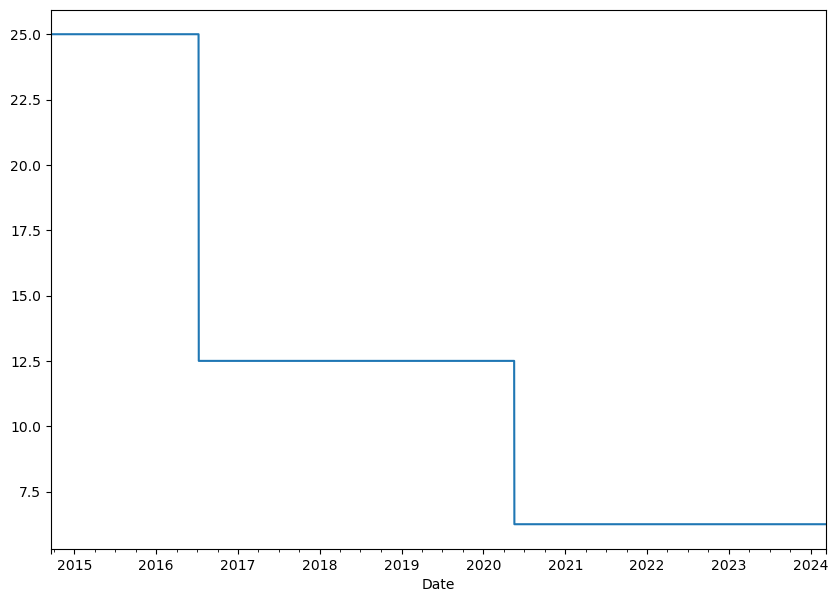

In [80]:
bitcoin_prices_block['block_reward'].plot(figsize = (10, 7));

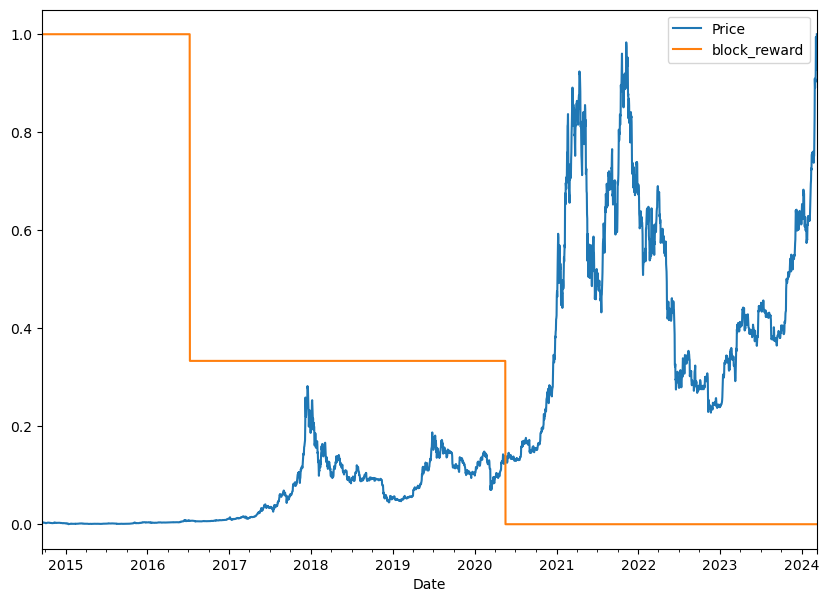

In [81]:
# Add btc price to plot
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10, 7));

### Windowing dataset

In [82]:
HORIZON = 1
WINDOW_SIZE = 7

In [83]:
# Make a copy of dataframe
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods = i + 1)
    
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [84]:
bitcoin_prices_windowed.tail(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-02-28,62504.789063,6.25,57085.371094,54522.402344,51733.238281,51571.101563,50731.949219,51304.972656,51839.179688
2024-02-29,61198.382813,6.25,62504.789063,57085.371094,54522.402344,51733.238281,51571.101563,50731.949219,51304.972656
2024-03-01,62440.632813,6.25,61198.382813,62504.789063,57085.371094,54522.402344,51733.238281,51571.101563,50731.949219
2024-03-02,62029.847656,6.25,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344,51733.238281,51571.101563
2024-03-03,63167.371094,6.25,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344,51733.238281
2024-03-04,68330.414063,6.25,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344
2024-03-05,63801.199219,6.25,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094
2024-03-06,66106.804688,6.25,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063
2024-03-07,66925.484375,6.25,66106.804688,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813


In [85]:
# Create X and y
X = bitcoin_prices_windowed.dropna().drop('Price', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [86]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [87]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2763, 691, 2763, 691)

## Model 6: Multivariate Dense Model

In [88]:
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_6_dense_multivariate')

# Compile
model_6.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_6.fit(X_train,
              y_train,
              epochs = 100,
              verbose = 0,
              batch_size = 128,
              validation_data = (X_test, y_test),
              callbacks = [create_model_checkpoint(model_name = model_6.name)])

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


In [89]:
# Evaluate model
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate/')
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 529.9236 - mae: 529.9236 - mse: 719218.4375


[529.9236450195312, 529.9236450195312, 719218.4375]

In [90]:
# Make predictions
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([39821.695, 40644.305, 41387.19 , 41441.918, 40706.56 ],
      dtype=float32)>

In [91]:
# Evaluate predictions
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'Mean Absolute Error': 529.92346,
 'Mean Squared Error': 719218.1,
 'Root Mean Squared Error': 848.06726,
 'Mean Absolute Percentage Error': 1.846343,
 'Mean Absolute Scaled Error': 1.0012063}

In [92]:
naive_results

{'Mean Absolute Error': 530.3807,
 'Mean Squared Error': 723649.7,
 'Root Mean Squared Error': 850.676,
 'Mean Absolute Percentage Error': 1.8382434,
 'Mean Absolute Scaled Error': 1.0004835}

In [93]:
model_1_results

{'Mean Absolute Error': 531.27814,
 'Mean Squared Error': 718646.1,
 'Root Mean Squared Error': 847.73,
 'Mean Absolute Percentage Error': 1.8565294,
 'Mean Absolute Scaled Error': 1.0037658}

In [94]:
model_2_results

{'Mean Absolute Error': 571.5028,
 'Mean Squared Error': 789122.6,
 'Root Mean Squared Error': 888.32574,
 'Mean Absolute Percentage Error': 2.0166574,
 'Mean Absolute Scaled Error': 1.0807217}

## N-BEATS Algorithm

### Build the N-BEASTS block layer

In [95]:
# Create custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation = 'linear', name = 'theta')
        
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        
        return backcast, forecast

In [96]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)

dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

# Create dummy inputs 
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0)

# Pass dummy inputs through dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f'Backcast: {tf.squeeze(backcast).numpy()}')
print(f'Forecast: {tf.squeeze(forecast).numpy()}')

Backcast: [-0.01223017  0.21539779 -0.5668418   0.3173412  -0.26153108 -0.3049268
 -0.25081557]
Forecast: -0.5437406301498413


### Prepare data

In [97]:
HORIZON = 1
WINDOW_SIZE = 7

In [99]:
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [100]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_price.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods = i + 1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [101]:
# Create X and y
X = bitcoin_prices_nbeats.dropna().drop('Price', axis = 1).astype(np.float32)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2763, 691, 2763, 691)

In [102]:
# Make dataset performant
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Hyperparameters

In [103]:
# Values from original paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Residual connections

In [104]:
# Test
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Print
print(f'Input tensors: {tensor_1.numpy()} and {tensor_2.numpy()}')
print(f'Subtracted: {subtracted.numpy()}')
print(f'Added: {added.numpy()}')

Input tensors: [10 11 12 13 14 15 16 17 18 19] and [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Modelling N-BEATS

In [105]:
tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
n_beats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                  theta_size = THETA_SIZE,
                                  horizon = HORIZON,
                                  n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS,
                                  name = 'initial_block')

# 2. Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE), name = 'stack_input')

# 3. Create initial backcast and forecast input
residuals, forecast = n_beats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1)): # -1 because we've already created one block layer
    # 5. Use NBeatsBlock to calculate backcase as well as the forecast
    backcast, forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                     theta_size = THETA_SIZE,
                                     horizon = HORIZON,
                                     n_neurons = N_NEURONS,
                                     n_layers = N_LAYERS,
                                     name = f'n_beats_block_{i}')(residuals)
    # 6. Create double residual stacking
    residuals = layers.subtract([residuals, backcast], name = f'subtract_{i}')
    forecast = layers.add([forecast, forecast], name = f'add_{i}')
    
# 7. Put the stack model together
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = 'model_7_nbeats')

# 8. Compile the model
model_7.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# 9. Fit the model
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                             patience = 100,
                                                             verbose = 1)])

2024-07-28 20:02:08.513748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype double and shape [2763]
	 [[{{node Placeholder/_2}}]]
2024-07-28 20:02:29.793061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype double and shape [691]
	 [[{{node Placeholder/_2}}]]



Epoch 110: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 739: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


KeyboardInterrupt: 

In [ ]:
# Evaluate model on test dataset
model_7.evaluate(test_dataset)

In [ ]:
# Make predictions
model_7_preds = model_7.predict(test_dataset)
model_7_preds[:5]

In [ ]:
# Evaluate model predictions
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)

In [ ]:
# Plot model
from tensorflow.keras.utils import plot_model

plot_model(model_7)